In [1]:
!pip install livelossplot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import keras
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
import tensorflow as tf


In [3]:
train_df = pd.read_csv('mnist_train.csv')
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels = train_df['label']
del train_df['label']

In [5]:
y = LabelBinarizer().fit_transform(train_labels)

In [6]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [7]:
train_df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.shape

(60000, 784)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2)

In [16]:
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [17]:
X_train.shape

(48000, 784)

In [18]:
loss_function = tf.keras.losses.CategoricalCrossentropy()

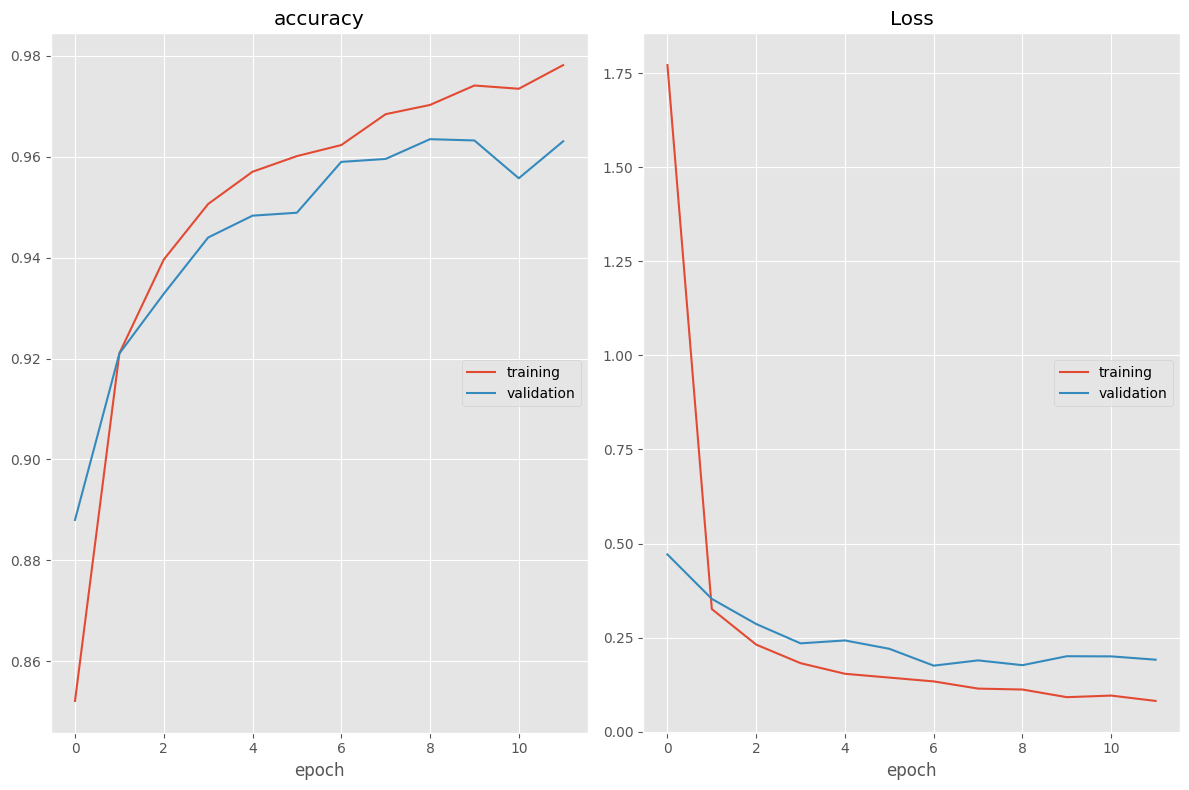

accuracy
	training         	 (min:    0.852, max:    0.978, cur:    0.978)
	validation       	 (min:    0.888, max:    0.964, cur:    0.963)
Loss
	training         	 (min:    0.081, max:    1.772, cur:    0.081)
	validation       	 (min:    0.175, max:    0.471, cur:    0.191)
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0815 - accuracy: 0.9782 - val_loss: 0.1911 - val_accuracy: 0.9631


In [20]:
import tensorflow as tf
model = tf.keras.models.Sequential()

#model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

monitor_val_loss = EarlyStopping(monitor='val_loss', patience=5)

callbacks=[PlotLossesKeras()]

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras(), monitor_val_loss], verbose = 1)

In [21]:
loss_function1 = tf.keras.losses.SparseCategoricalCrossentropy()

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_df, train_labels, test_size=0.2)

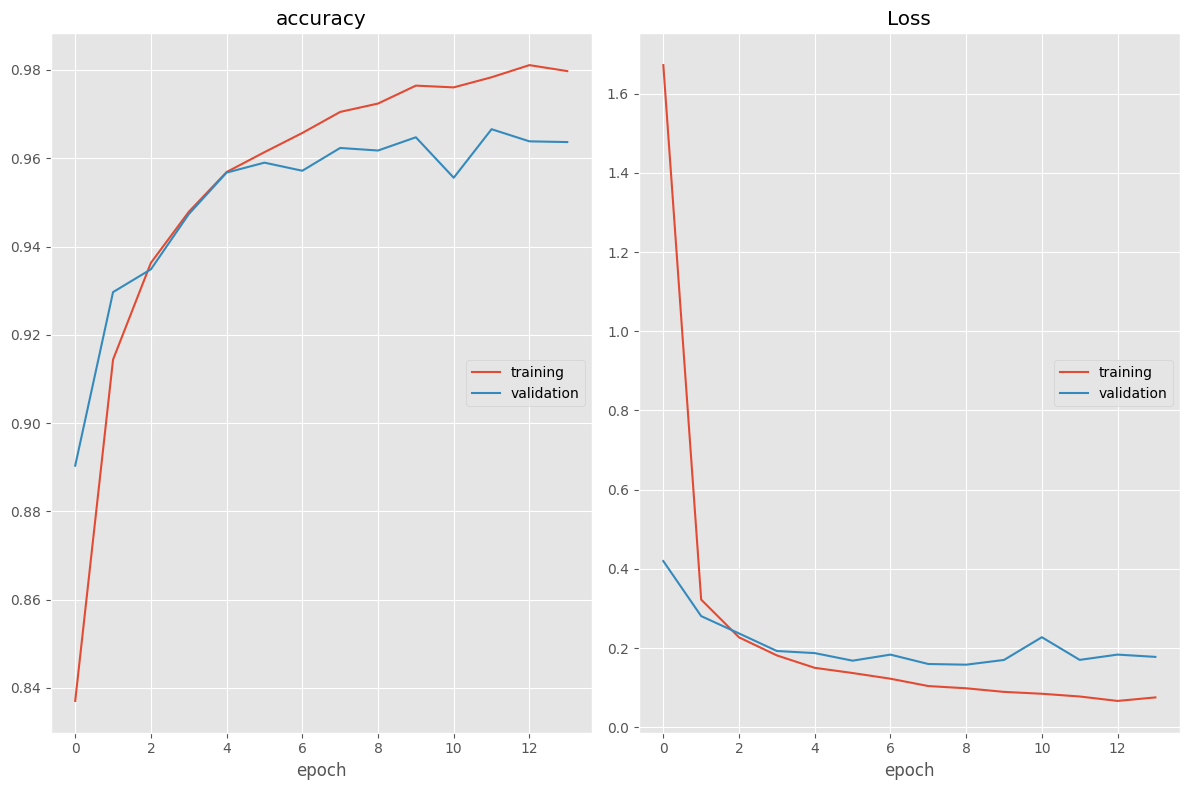

accuracy
	training         	 (min:    0.837, max:    0.981, cur:    0.980)
	validation       	 (min:    0.890, max:    0.967, cur:    0.964)
Loss
	training         	 (min:    0.066, max:    1.672, cur:    0.075)
	validation       	 (min:    0.158, max:    0.420, cur:    0.178)
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0754 - accuracy: 0.9797 - val_loss: 0.1777 - val_accuracy: 0.9637


In [23]:
import tensorflow as tf
model = tf.keras.models.Sequential()

#model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss=loss_function1, metrics=['accuracy'])

monitor_val_loss = EarlyStopping(monitor='val_loss', patience=5)

callbacks=[PlotLossesKeras()]

model.fit(X_train1, y_train1, epochs=100, validation_data=(X_test1, y_test1), callbacks=[PlotLossesKeras(), monitor_val_loss], verbose = 1)